#                            EDA on Super Market Dataset

This EDA will be on the supermarket dataset where we will try to deal with some business related problem 
statements.

__Is  supermarket more popular with males or females?__ 

__What does the customer rating look like and  its skewness?__ 

__About the aggregate sales across the branches.__

__Most popular payment method used by customers.__

After that we will dig deep and then will try to solve more such problems like:

__Does gross income affect customer ratings?__ 

__Which is the most profitable branch?__ 

__How is the relationship between Gender and Gross income?__ 

__Time trend in gross income?__ 

__Which product line helps you generate the most income?__ 

__What is the spending pattern of both males and females, meaning in which category do they spend more?__ 

__How many products are bought by customers?__

__Which day of the week has maximum sales?__ 

__Which hour of the day is busiest?__ 

__Which product line should your supermarket focus on?__ 

__Which city should be chosen for expansion and what products should be focussed on?__

__So let's get our hands dirty with the data and get some meaningful insights from it....__

# Data set loading and Overview of the dataset

*Before loading the dataset we will first import some necessary libraries that will be required for further analysis*

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
#Loading the dataset

supermart = pd.read_csv("supermarket_sales (1).csv")
supermart.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#We will find the shape of the dataset using this function to get the number of rows and columns present

supermart.shape

(1000, 17)

__It's time to get the 5 point summary of the dataset that what exactly we are going  to deal with.__

In [4]:
#The datatypes we have because based on their types only we can deal with the features

supermart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

No missing values found in the dataset.....so we will see if there are any wrong entries present here or not.

In [5]:
#getting the 5 point summary to see the measures of central tendency and deviation

supermart.describe(include = 'all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,665-63-9737,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


__As we can see the name of other variables are clearly mentioned except on which is cogs. So this cogs is nothing but
Cost of Goods sold__.

In [6]:
#so we can change its name 

supermart.rename(columns= {'cogs': 'cost_of_goods_sold', 'Payment': 'Payment_mode'}, inplace = True)
supermart.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment_mode,cost_of_goods_sold,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [7]:
supermart['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [8]:
supermart['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [9]:
supermart.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment_mode                  3
cost_of_goods_sold          990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [10]:
supermart['Payment_mode'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [11]:
supermart['Unit price'].unique()

array([74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.84, 73.56, 36.26,
       54.84, 14.48, 25.51, 46.95, 43.19, 71.38, 93.72, 68.93, 72.61,
       54.67, 40.3 , 86.04, 87.98, 33.2 , 34.56, 88.63, 52.59, 33.52,
       87.67, 88.36, 24.89, 94.13, 78.07, 83.78, 96.58, 99.42, 68.12,
       62.62, 60.88, 54.92, 30.12, 86.72, 56.11, 69.12, 98.7 , 15.37,
       93.96, 56.69, 20.01, 18.93, 82.63, 91.4 , 44.59, 17.87, 15.43,
       16.16, 85.98, 44.34, 89.6 , 72.35, 30.61, 24.74, 55.73, 55.07,
       15.81, 75.74, 15.87, 33.47, 97.61, 78.77, 18.33, 89.48, 62.12,
       48.52, 75.91, 74.67, 41.65, 49.04, 78.31, 20.38, 99.19, 96.68,
       19.25, 80.36, 48.91, 83.06, 76.52, 49.38, 42.47, 76.99, 47.38,
       44.86, 21.98, 64.36, 89.75, 97.16, 87.87, 12.45, 52.75, 82.7 ,
       48.71, 78.55, 23.07, 58.26, 30.35, 88.67, 27.38, 62.13, 33.98,
       81.97, 16.49, 98.21, 72.84, 58.07, 80.79, 27.02, 21.94, 51.36,
       10.96, 53.44, 99.56, 57.12, 99.96, 63.91, 56.47, 93.69, 32.25,
       31.73, 68.54,

In [12]:
supermart['Quantity'].unique()

array([ 7,  5,  8,  6, 10,  2,  3,  4,  1,  9], dtype=int64)

In [13]:
supermart['Total'].unique()

array([ 548.9715,   80.22  ,  340.5255,  489.048 ,  634.3785,  627.6165,
        433.692 ,  772.38  ,   76.146 ,  172.746 ,   60.816 ,  107.142 ,
        246.4875,  453.495 ,  749.49  ,  590.436 ,  506.6355,  457.443 ,
        172.2105,   84.63  ,  451.71  ,  277.137 ,   69.72  ,  181.44  ,
        279.1845,  441.756 ,   35.196 ,  184.107 ,  463.89  ,  235.2105,
        494.1825,  737.7615,  703.752 ,  202.818 ,  417.564 ,   71.526 ,
        328.755 ,  575.316 ,  461.328 ,  253.008 ,   91.056 ,  117.831 ,
        435.456 ,  829.08  ,   32.277 ,  394.632 ,  535.7205,  189.0945,
        119.259 ,  867.615 ,  671.79  ,  234.0975,   75.054 ,   16.2015,
         33.936 ,  722.232 ,   93.114 ,  752.64  ,  759.675 ,  192.843 ,
         77.931 ,  351.099 ,  520.4115,  166.005 ,  318.108 ,  166.635 ,
         70.287 ,  614.943 ,  827.085 ,   19.2465,  939.54  ,  652.26  ,
        152.838 ,  478.233 ,  705.6315,  437.325 ,  463.428 ,  822.255 ,
        106.995 ,  624.897 ,  304.542 ,  161.7   , 

So by checking the important columns for errenous values we are certain now that we don't have wrong entries in our data.

# Removing Unnecessary feaures 

In [14]:
#dropping the id column as it is not giving us any information

supermart.drop(columns= ['Invoice ID'], axis = 0,inplace = True)
supermart.head(1)


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment_mode,cost_of_goods_sold,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


# Popularity of supermarket in Gender wise

__Talking about distribution it seems that the distribution of gender is equal here.__

In [57]:
supermart['Gender'].value_counts()  #females 2 more than males

Female    501
Male      499
Name: Gender, dtype: int64

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

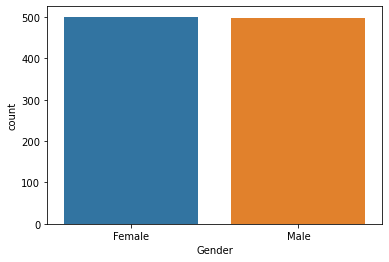

In [15]:
sns.countplot(supermart.Gender)

<AxesSubplot:xlabel='Gender', ylabel='Rating'>

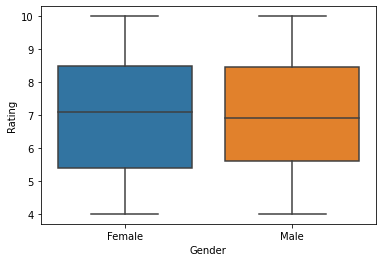

In [16]:
sns.boxplot(x = 'Gender', y ='Rating', data = supermart)

# Superstore is more famous among females, difference is marginal though.

__Now let's look at the rating distribution of supermarket__

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


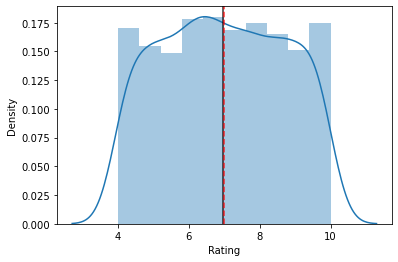

In [17]:
sns.distplot(supermart.Rating)
plt.axvline(x = supermart.Rating.mean(), color = 'black', alpha = 0.8, label = 'Mean')
plt.axvline(x = supermart.Rating.median(), color = 'red', ls = '--' ,alpha = 0.8, label = 'Median')

The distribution of this feature is __Normal__.

In [70]:
supermart['Rating'].skew()

0.00900964876573073

__Aggregate sales across the branches__

In [71]:
A = supermart[(supermart['Branch']== "A")]
a_agg = A['cost_of_goods_sold'].aggregate(['min', 'max','sum'])

In [72]:
B = supermart[(supermart['Branch']== "B")]
b_agg = B['cost_of_goods_sold'].aggregate(['min', 'max','sum'])

In [73]:
C = supermart[(supermart['Branch']== "C")]
c_agg = C['cost_of_goods_sold'].aggregate(['min', 'max', 'sum'])

In [74]:
agregates = {'A': a_agg, 'B': b_agg, 'C': c_agg}
pd.DataFrame(agregates)

,A,B,C
min,12.09,17.75,10.17
max,989.80,973.80,993.00
sum,101143.21,101140.64,105303.53


In [75]:
a = supermart[(supermart['Branch']== "A")]
aa_agg = A['Total'].aggregate(['min', 'max','sum'])
b = supermart[(supermart['Branch']== "A")]
bb_agg = A['Total'].aggregate(['min', 'max','sum'])
c = supermart[(supermart['Branch']== "A")]
cc_agg = A['Total'].aggregate(['min', 'max','sum'])

In [76]:
Agregates = {'A': a_agg, 'B': b_agg, 'C': c_agg}
pd.DataFrame(Agregates)

,A,B,C
min,12.09,17.75,10.17
max,989.80,973.80,993.00
sum,101143.21,101140.64,105303.53


__Alternative method__

In [82]:
supermart.groupby('Branch')['Total'].aggregate(['max','min','sum']).sort_values(by = 'sum', ascending = False)        

,max,min,sum
Branch,,,
C,1042.65,10.6785,110568.7065
A,1039.29,12.6945,106200.3705
B,1022.49,18.6375,106197.6720


So as we can see above branch __C__ is performing well among the 3 branches in terms of __sum,min,max__.
like it is the branch witnessing minimum sales and it recieving maximum sales also.....

__One interesting thing here to observe is the difference between the minimum and the maximum sales values__.


In [88]:
B_data = supermart[(supermart['Branch'] == 'B')]
B_data['Total'].describe()

count     332.000000
mean      319.872506
std       242.447565
min        18.637500
25%       119.936250
50%       252.882000
75%       465.585750
max      1022.490000
Name: Total, dtype: float64

# Popular payment method

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment_mode', ylabel='count'>

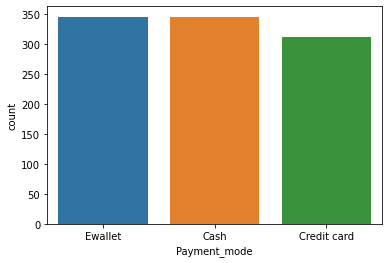

In [101]:
sns.countplot(supermart.Payment_mode)

<AxesSubplot:xlabel='Payment_mode', ylabel='Total'>

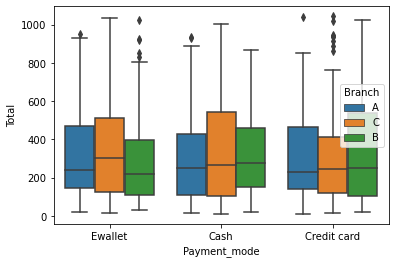

In [106]:
figsize = (15,20)
sns.boxplot(x = 'Payment_mode', y = 'Total', hue = 'Branch', data = supermart)

In [100]:
supermart.groupby('Payment_mode')['Total'].aggregate(['max','min','sum']).sort_values(by = 'sum', ascending = False)        

,max,min,sum
Payment_mode,,,
Cash,1003.59,10.6785,112206.570
Ewallet,1034.46,13.4190,109993.107
Credit card,1042.65,12.6945,100767.072


<AxesSubplot:ylabel='Total'>

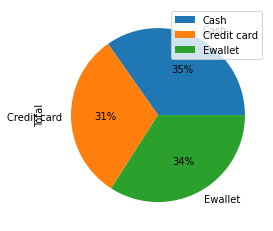

In [116]:
supermart.groupby(['Payment_mode']).sum().plot(kind='pie', y='Total',autopct='%1.0f%%')

__Cash is the most popular payment method among customers__.